# ESG Funds Data Analysis Project

## Project Objectives
1. ESG funds Perofrmance Analysis

    - When do The ESG funds Outperform or Downperform?
    - Reasons for this performance.
    
2. Extract any other relevant insights fromn the datasets.

In [33]:
#Required Libraries
import pandas as pd

#Required Functions
def print_bordered_table(df):
    """
    Print a pandas DataFrame with borders for better readability.

    Parameters:
    df (pandas.DataFrame): The DataFrame to print.
    """
    # Calculate the maximum length of the column names for formatting
    max_lengths = [max(len(str(item)) for item in df[col]) for col in df.columns]
    max_lengths = [max(len(col), length) for col, length in zip(df.columns, max_lengths)]

    # Print header
    header = "| " + " | ".join(f"{col:<{length}}" for col, length in zip(df.columns, max_lengths)) + " |"
    print(header)
    print("|" + "-" * (len(header) - 2) + "|")  # Print separator

    # Print rows with borders
    for index, row in df.iterrows():
        print("| " + " | ".join(f"{str(value):<{length}}" for value, length in zip(row, max_lengths)) + " |")

    print("\n")  # Add a newline for better separation between tables

#for the table with percentages and row headers
def display_fund_composition_as_percentages(df):
    # Create a copy of the DataFrame to format for display
    formatted_output = df.copy()
    
    # Formatting the percentages to two decimal places
    formatted_output['Narcissus Core Equity Sustainability Fund'] = (
        formatted_output['Narcissus Core Equity Sustainability Fund'] * 100
    ).map('{:.2f}%'.format)

    formatted_output['Pietro Advisory Sustainable Large Cap ETF'] = (
        formatted_output['Pietro Advisory Sustainable Large Cap ETF'] * 100
    ).map('{:.2f}%'.format)

    # Create borders and headers for Narcissus table
    border_length = max(len("Sector"), len("Narcissus Core Equity Sustainability Fund")) + 4
    border = '+' + '-' * border_length + '+'
    
    # Print the Narcissus Core Equity Sustainability Fund table
    print(border)  # Top border
    print('| {:<35} | {:<40} |'.format('Sector', 'Narcissus Core Equity Sustainability Fund'))
    print(border)  # Header border
    
    for index, row in formatted_output.iterrows():
        print('| {:<35} | {:<40} |'.format(index, row['Narcissus Core Equity Sustainability Fund']))
    
    print(border)  # Bottom border
    print()  # Blank line between tables

    # Create borders and headers for Pietro table
    print(border)  # Top border
    print('| {:<35} | {:<40} |'.format('Sector', 'Pietro Advisory Sustainable Large Cap ETF'))
    print(border)  # Header border
    
    for index, row in formatted_output.iterrows():
        print('| {:<35} | {:<40} |'.format(index, row['Pietro Advisory Sustainable Large Cap ETF']))
    
    print(border)  # Bottom border

# Function to display correlation matrix in a formatted table
def display_correlation_matrix(correlation_matrix, title):
    # Print the title
    print(f"{title} Correlation Matrix")
    
    # Determine the maximum width for formatting
    max_width = max(max(len(col) for col in correlation_matrix.columns), 
                    max(len(index) for index in correlation_matrix.index)) + 2  # Add space for padding

    # Create the border for the table
    border_length = max_width * (len(correlation_matrix.columns) + 1) + 1
    border = '+' + '-' * (border_length - 2) + '+'
    
    print(border)  # Top border
    
    # Create header row: starts at column B
    header = '| ' + ' ' * (max_width - 2) + ' | ' + ' | '.join(f"{col:<{max_width-1}}" for col in correlation_matrix.columns) + ' |'
    print(header)  # Header row
    print(border)  # Header border
    
    # Iterate over each row to print the data
    for index, row in correlation_matrix.iterrows():
        row_values = ' | '.join(f"{value:.3f}".center(max_width) for value in row)  # Format each value
        # Data row with index
        print(f'| {index:<{max_width-2}} | {row_values} |')  # Data row
    
    print(border)  # Bottom border
    print()  # Blank line for spacing



### Loading Datasets and renaming columns

In [34]:
import pandas as pd

# Load the data from the CSV files
factsheet = pd.read_csv('data/factsheet.csv')
performance = pd.read_csv('data/performance.csv')

# Renaming function
def clean_column_names(column_names):
    cleaned_columns = []
    for col in column_names:
        # Remove consecutive dots and replace them with a single dot
        new_col = col.replace('..', '.').replace('.', '_')
        
        # Handle specific renaming cases
        if col == 'X':
            new_col = 'metrics_&_Sectors'
        
        # Add cleaned column name to the list
        cleaned_columns.append(new_col)
    return cleaned_columns

# Clean and rename columns in performance and factsheet
performance.columns = clean_column_names(performance.columns)
factsheet.columns = clean_column_names(factsheet.columns)

# Function to neatly print column names
def print_columns(title, columns):
    print(f"{title} Columns:")
    print("=" * 50)  # Divider line
    for col in columns:
        print(f"- {col}")
    print("\n")  # Add extra line for better spacing

# Print column names in a neat format
print_columns("Performance", performance.columns)
print_columns("Factsheet", factsheet.columns)


Performance Columns:
- Effective_date
- S_P_500
- Narcissus_Core_Equity_Sustainability_Fund_NAV_in__
- Pietro_Advisory_Sustainable_Large_Cap_ETF_NAV_in__
- a[, 7]
- S_P_500_Energy_Sector_
- S_P_500_Utilities_Sector_
- Effective_date_1
- S_P_500_Communication_Services_Sector_
- S_P_500_Consumer_Discretionary_Sector_
- S_P_500_Consumer_Staples_Sector_
- S_P_500_Financials_Sector_
- S_P_500_Health_Care_Sector_
- S_P_500_Industrials_Sector_
- S_P_500_Information_Technology_Sector_
- S_P_500_Materials_Sector_
- S_P_500_Real_Estate_Sector_


Factsheet Columns:
- metrics_&_Sectors
- S_P_500
- Narcissus_Core_Equity_Sustainability_Fund
- Pietro_Advisory_Sustainable_Large_Cap_ETF
- Dow_Jones_U_S_Large_Cap_Total_Stock_Market_Index
- S_P_500_Energy_Sector_
- S_P_500_Utilities_Sector_
- S_P_500_Comm_Service_
- S_P_500_Cons_Disc_
- S_P_500_Cons_Staples_
- S_P_500_Financials_Sector_
- S_P_500_Health_Care_
- S_P_500_Industrials_Sector_
- S_P_500_Info_Tech_
- S_P_500_Materials_Sector_
- S_P_500_Real_Es

### Data Cleaning 

In [35]:
# Convert percentage values from whole numbers to proper percentages
sector_rows = ['Information Technology', 'Financials', 'Health Care', 'Consumer Discretionary',
               'Communication Services', 'Industrials', 'Consumer Staples', 'Energy', 
               'Utilities', 'Real Estate', 'Materials']

factsheet.loc[factsheet.iloc[:, 0].isin(sector_rows), factsheet.columns[1:]] = \
    factsheet.loc[factsheet.iloc[:, 0].isin(sector_rows), factsheet.columns[1:]].apply(lambda x: x / 100)


# Preview the cleaned data in a neat bordered format
print("Cleaned Factsheet Data:")
print("=" * 50)  # Divider line
print_bordered_table(factsheet)


Cleaned Factsheet Data:
| metrics_&_Sectors                                               | S_P_500              | Narcissus_Core_Equity_Sustainability_Fund | Pietro_Advisory_Sustainable_Large_Cap_ETF | Dow_Jones_U_S_Large_Cap_Total_Stock_Market_Index | S_P_500_Energy_Sector_ | S_P_500_Utilities_Sector_ | S_P_500_Comm_Service_ | S_P_500_Cons_Disc_ | S_P_500_Cons_Staples_ | S_P_500_Financials_Sector_ | S_P_500_Health_Care_ | S_P_500_Industrials_Sector_ | S_P_500_Info_Tech_ | S_P_500_Materials_Sector_ | S_P_500_Real_Estate_ |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [36]:
# Remove duplicate 'Effective Date' column
performance = performance.drop(columns=['Effective_date_1'])

# Handle missing data '././.' by replacing it with NaN (Not a Number)
performance.replace('././.', pd.NA, inplace=True)

# Convert relevant columns to numeric (where appropriate)
performance.iloc[:, 1:] = performance.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Preview the cleaned performance data in a neat bordered format
print("Cleaned Performance Data:")
print("=" * 50)  # Divider line
print_bordered_table(performance)


Cleaned Performance Data:
| Effective_date | S_P_500 | Narcissus_Core_Equity_Sustainability_Fund_NAV_in__ | Pietro_Advisory_Sustainable_Large_Cap_ETF_NAV_in__ | a[, 7]   | S_P_500_Energy_Sector_ | S_P_500_Utilities_Sector_ | S_P_500_Communication_Services_Sector_ | S_P_500_Consumer_Discretionary_Sector_ | S_P_500_Consumer_Staples_Sector_ | S_P_500_Financials_Sector_ | S_P_500_Health_Care_Sector_ | S_P_500_Industrials_Sector_ | S_P_500_Information_Technology_Sector_ | S_P_500_Materials_Sector_ | S_P_500_Real_Estate_Sector_ |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### ESG funds Perofrmance Analysis

- Determine the Rate of change for the two ESG Funds and the S&P 500 index.
- Identify Periods of Outperfrormance and Downperformance bassed on rate of change between ESG Funds and S&P 500.

##### Monthly Rate of Change
- Outperformance: If the ESG fund's rate of change is higher than the S&P 500's rate of change in a given month, the ESG fund has outperformed.

- Downperformance: If the ESG fund's rate of change is lower than the S&P 500's rate of change, the ESG fund has underperformed.

In [39]:
# Calculate monthly rate of change for the first ESG fund, second ESG fund, and S&P 500
performance['Narcissus_Core_MoM'] = performance['Narcissus_Core_Equity_Sustainability_Fund_NAV_in__'].pct_change() * 100
performance['Pietro_Advisory_MoM'] = performance['Pietro_Advisory_Sustainable_Large_Cap_ETF_NAV_in__'].pct_change() * 100
performance['S&P_500_MoM'] = performance['S_P_500'].pct_change() * 100

# View the calculated rate of change
print('|Monthly Rate of Change')
print_bordered_table(performance[['Effective_date', 'Narcissus_Core_MoM', 'Pietro_Advisory_MoM', 'S&P_500_MoM']].head())

|Monthly Rate of Change
| Effective_date | Narcissus_Core_MoM | Pietro_Advisory_MoM | S&P_500_MoM        |
|--------------------------------------------------------------------------------|
| 1/8/2014       | nan                | nan                 | nan                |
| 2/9/2014       | 2.2020725388601115 | 4.071633721912482   | 4.0064410565410435 |
| 1/10/2014      | 3.9036755386565147 | -2.662337662337666  | -2.802804802525116 |
| 3/11/2014      | 1.2198097096852933 | 3.919279519679786   | 3.6816089119085627 |
| 1/12/2014      | 0.2892263195950706 | 1.8456106563954355  | 1.7657757667966845 |




#### Note
    the first row in the tables of rate of change always has nan because this is the orginal date we started with, since we need a previous value to get a rate of change the orginal data will have nan.

##### Plotting the Data in Pandas

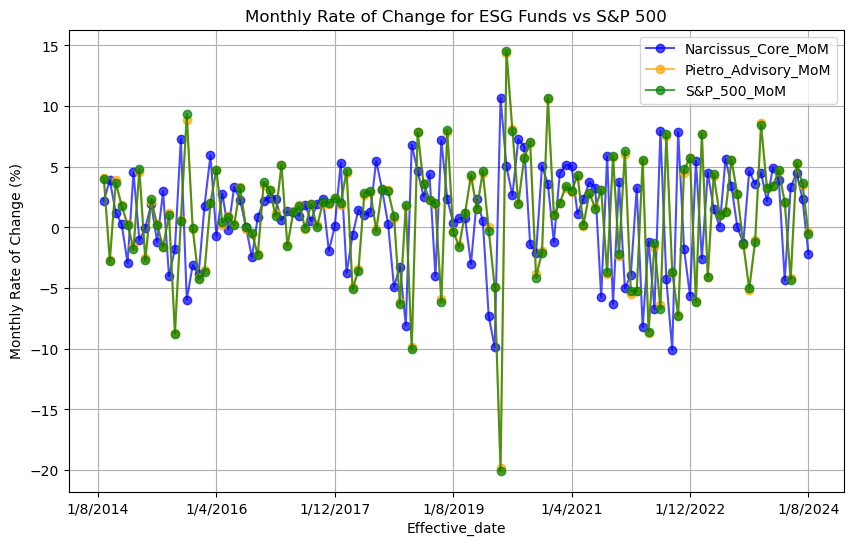

In [7]:
# Plot the rate of change for all three: ESG Fund 1, ESG Fund 2, and S&P 500
ax = performance[['Effective_date', 'Narcissus_Core_MoM', 'Pietro_Advisory_MoM', 'S&P_500_MoM']].set_index('Effective_date').plot(
    figsize=(10, 6),
    title='Monthly Rate of Change for ESG Funds vs S&P 500',
    ylabel='Monthly Rate of Change (%)',
    grid=True,
    linestyle='-',  # Change to solid lines
    marker='o',      # Add circle markers for each point
    alpha=0.7,       # Set transparency to reduce overlap
    color=['blue', 'orange', 'green', 'red']  # Assign specific colors
)

#### Identify periods of high performace of the the 2 ESG funds compared to the S&P 500

In [41]:
# Step 1: Create a new column to identify outperformance
performance['Narcissus_Outperform'] = performance['Narcissus_Core_MoM'] > performance['S&P_500_MoM']
performance['Pietro_Outperform'] = performance['Pietro_Advisory_MoM'] > performance['S&P_500_MoM']

# Step 2: Extract the dates where the funds outperformed the S&P 500
narcissus_outperformance_dates = performance[performance['Narcissus_Outperform']][['Effective_date', 'Narcissus_Core_MoM']]
pietro_outperformance_dates = performance[performance['Pietro_Outperform']][['Effective_date', 'Pietro_Advisory_MoM']]

# Display the results
print("|Narcissus Core Equity Sustainability Fund Outperformance Dates Compared to S&P_500")
print_bordered_table(narcissus_outperformance_dates)

print("|Pietro Advisory Sustainable Large Cap ETF Outperformance Dates Compared to S&P_500")
print_bordered_table(pietro_outperformance_dates)

|Narcissus Core Equity Sustainability Fund Outperformance Dates Compared to S&P_500
| Effective_date | Narcissus_Core_MoM    |
|----------------------------------------|
| 1/10/2014      | 3.9036755386565147    |
| 2/2/2015       | 4.530824461500371     |
| 1/4/2015       | -0.023940627244445345 |
| 1/7/2015       | 2.9726516052318575    |
| 1/9/2015       | -1.7805582290664201   |
| 1/10/2015      | 7.32484076433122      |
| 4/1/2016       | -3.8837384114256968   |
| 1/2/2016       | 1.7987486965589161    |
| 1/3/2016       | 5.941101152368766     |
| 2/5/2016       | 2.7750730282375846    |
| 1/7/2016       | 3.322259136212624     |
| 1/9/2016       | 0.02245677071637253   |
| 1/11/2016      | 0.8517495395948593    |
| 1/2/2017       | 2.375762859633812     |
| 3/4/2017       | 1.3124470787468256    |
| 1/5/2017       | 1.2536564981195264    |
| 3/7/2017       | 1.880237073370128     |
| 1/9/2017       | 1.9553072625698498    |
| 2/10/2017      | 2.3679060665362073    |
| 2/1/2018   

##### Yearly Rate of Change

In [46]:
# Convert 'Effective_date' to datetime if not already done
performance['Effective_date'] = pd.to_datetime(performance['Effective_date'], format='%d/%m/%Y')

# Create a copy of the original performance DataFrame
performance_copy = performance.copy()

# Set the 'Effective_date' as the index for the copied DataFrame
performance_copy.set_index('Effective_date', inplace=True)

# Resample the data to yearly frequency and take the last observation for each year
performance_yearly = performance_copy.resample('Y').last()

# Calculate yearly rate of change
performance_yearly['Narcissus_Core_YoY'] = performance_yearly['Narcissus_Core_Equity_Sustainability_Fund_NAV_in__'].pct_change() * 100
performance_yearly['Pietro_Advisory_YoY'] = performance_yearly['Pietro_Advisory_Sustainable_Large_Cap_ETF_NAV_in__'].pct_change() * 100
performance_yearly['S&P_500_YoY'] = performance_yearly['S_P_500'].pct_change() * 100

# Create a new column for the year
performance_yearly['Year'] = performance_yearly.index.year

# Reset the index to make 'Effective_date' a column and keep only the year
performance_yearly.reset_index(drop=True, inplace=True)

# View the calculated yearly rate of change with the Year column
print('|Yearly Rate of Change')
print_bordered_table(performance_yearly[['Year', 'Narcissus_Core_YoY', 'Pietro_Advisory_YoY', 'S&P_500_YoY']].head())


|Yearly Rate of Change
| Year | Narcissus_Core_YoY  | Pietro_Advisory_YoY | S&P_500_YoY       |
|----------------------------------------------------------------------|
| 2014.0 | nan                 | nan                 | nan               |
| 2015.0 | -4.085556356645048  | 2.4897573274503815  | 2.395492441951075 |
| 2016.0 | 12.20245552493111   | 4.089790897908974   | 4.206636450540513 |
| 2017.0 | 14.649397052255475  | 21.03397341211226   | 20.58984610329153 |
| 2018.0 | -3.5255161667316015 | 5.369782767878939   | 5.607027423908684 |




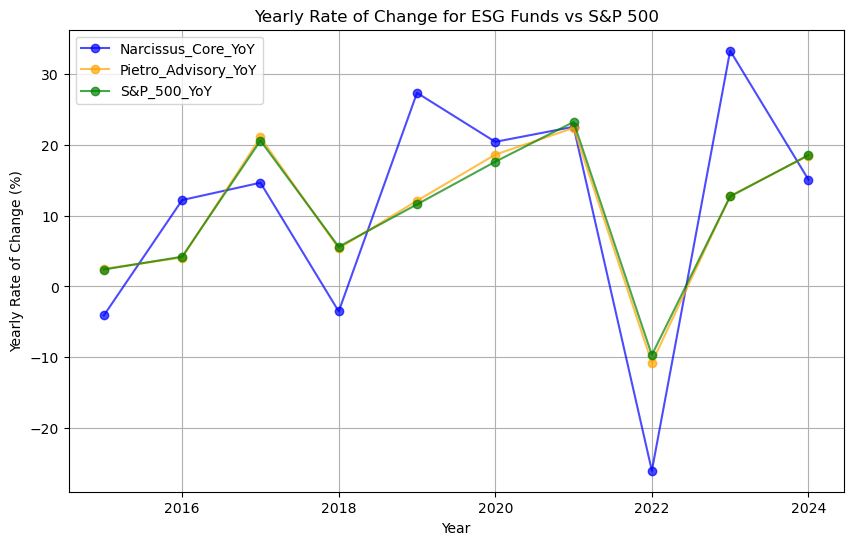

In [30]:
# Plot the yearly rate of change for all three: ESG Fund 1, ESG Fund 2, and S&P 500
ax = performance_yearly[['Year','Narcissus_Core_YoY', 'Pietro_Advisory_YoY', 'S&P_500_YoY']].set_index('Year').plot(
    figsize=(10, 6),
    title='Yearly Rate of Change for ESG Funds vs S&P 500',
    ylabel='Yearly Rate of Change (%)',
    grid=True,
    linestyle='-',  # Solid lines
    marker='o',      # Circle markers for each point
    alpha=0.7,       # Transparency
    color=['blue', 'orange', 'green']  # Specific colors for each fund
)


#### Reasons for good and bad performance of ESG funds

##### Sectors where ESG Funds is investing

In [47]:
# Your existing code
fund_composition = factsheet.iloc[3:14, [0, 2, 3]].reset_index(drop=True)

# Rename columns for clarity
fund_composition.columns = ['Sector', 'Narcissus Core Equity Sustainability Fund', 'Pietro Advisory Sustainable Large Cap ETF']

# Convert values to numeric if they're not already (assuming they're percentages)
fund_composition['Narcissus Core Equity Sustainability Fund'] = pd.to_numeric(fund_composition['Narcissus Core Equity Sustainability Fund'], errors='coerce')
fund_composition['Pietro Advisory Sustainable Large Cap ETF'] = pd.to_numeric(fund_composition['Pietro Advisory Sustainable Large Cap ETF'], errors='coerce')

# Add the sectors from the first column (A) to the DataFrame
fund_composition['Sector'] = factsheet.iloc[3:14, 0].reset_index(drop=True)

# Set the Sector column as the index
fund_composition.set_index('Sector', inplace=True)

# Remove rows where values are 0% for both funds separately
narcissus_non_zero = fund_composition[fund_composition['Narcissus Core Equity Sustainability Fund'] > 0]
pietro_non_zero = fund_composition[fund_composition['Pietro Advisory Sustainable Large Cap ETF'] > 0]

# Define a custom color list
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ffbb78'
]

# Define custom text properties for percentage labels
textprops = {'fontsize': 9, 'fontweight': 'light', 'color': 'black'}

# Call the function to display the fund composition as percentages
print('|Allocation of investment per ESG Fund')
display_fund_composition_as_percentages(fund_composition)



|Allocation of investment per ESG Fund
+---------------------------------------------+
| Sector                              | Narcissus Core Equity Sustainability Fund |
+---------------------------------------------+
| Information Technology              | 36.40%                                   |
| Financials                          | 17.50%                                   |
| Health Care                         | 5.50%                                    |
| Consumer Discretionary              | 5.20%                                    |
| Communication Services              | 9.69%                                    |
| Industrials                         | 8.80%                                    |
| Consumer Staples                    | 5.80%                                    |
| Energy                              | 0.00%                                    |
| Utilities                           | 0.00%                                    |
| Real Estate                     

##### Plots for ESG Funds Sector investing distribution

<Axes: title={'center': 'Composition of Narcissus Core Equity Sustainability Fund'}>

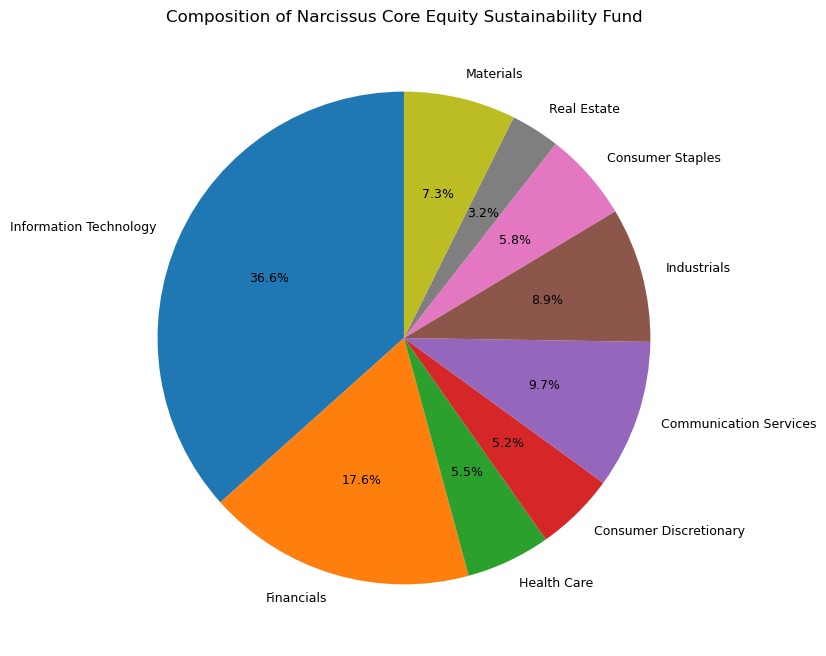

In [26]:
# Plot for Narcissus Core Equity Sustainability Fund (excluding 0% values)
narcissus_non_zero['Narcissus Core Equity Sustainability Fund'].plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    title='Composition of Narcissus Core Equity Sustainability Fund',
    ylabel='',  # No y-label for pie chart
    figsize=(8, 8),  # Adjust size for better visibility
    labels=narcissus_non_zero.index,  # Set labels to sector names
    colors=custom_colors[:len(narcissus_non_zero)],# Use the custom color list
    textprops=textprops
)

<Axes: title={'center': 'Composition of Pietro Advisory Sustainable Large Cap ETF'}>

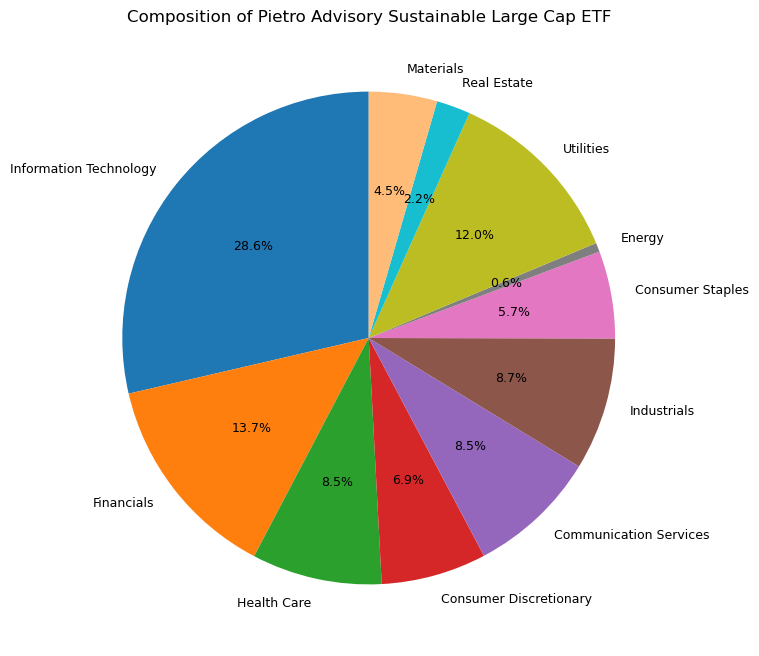

In [27]:
# Plot for Pietro Advisory Sustainable Large Cap ETF (excluding 0% values)
pietro_non_zero['Pietro Advisory Sustainable Large Cap ETF'].plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    title='Composition of Pietro Advisory Sustainable Large Cap ETF',
    ylabel='',  # No y-label for pie chart
    figsize=(8, 8),  # Adjust size for better visibility
    labels=pietro_non_zero.index,  # Set labels to sector names
    colors=custom_colors[:len(pietro_non_zero)],  # Use the custom color list
    textprops=textprops
)

#### Clues
Based on the pie charts, the ESG funds biggest investing sectors are: Information technology, Financials and Industrial(utilities is the third heighest for the 2nd fund but we will use industrials because its presenet in both)
this gives us an ivestigation clue to look into the correlation in performance changes between the ESG funds and these Sectors listed in the S&P 500.

#### Second step:
we will conduct a correlation analysis in terms of performance between:

- The ESG funds value
- The S&P 500 Information Technology 
- The S&P 500 Financials
- The S&P 500 Industrials

In [50]:
# Calculate the percentage change (rate of change) for each fund and sector
performance['Narcissus_ESG_RoC'] = performance['Narcissus_Core_Equity_Sustainability_Fund_NAV_in__'].pct_change() * 100
performance['Pietro_ESG_RoC'] = performance['Pietro_Advisory_Sustainable_Large_Cap_ETF_NAV_in__'].pct_change() * 100
performance['S&P_500_IT_RoC'] = performance['S_P_500_Information_Technology_Sector_'].pct_change() * 100
performance['S&P_500_Financials_RoC'] = performance['S_P_500_Financials_Sector_'].pct_change() * 100
performance['S&P_500_Industrials_RoC'] = performance['S_P_500_Industrials_Sector_'].pct_change() * 100
performance['S&P_500_Energy_ROC'] = performance['S_P_500_Energy_Sector_'].pct_change() * 100
performance['S_P_500_ROC'] = performance['S_P_500'].pct_change() * 100

# Display the calculated rate of change
print('|Rate of cahnge for the esg funds and the S&P500 and some other S&P500 sectors')
print_bordered_table(performance[['Effective_date', 'Narcissus_ESG_RoC', 'Pietro_ESG_RoC', 'S_P_500', 'S&P_500_IT_RoC', 'S&P_500_Financials_RoC', 'S&P_500_Industrials_RoC','S&P_500_Energy_ROC']].head())


|Rate of cahnge for the esg funds and the S&P500 and some other S&P500 sectors
| Effective_date      | Narcissus_ESG_RoC  | Pietro_ESG_RoC     | S_P_500 | S&P_500_IT_RoC     | S&P_500_Financials_RoC | S&P_500_Industrials_RoC | S&P_500_Energy_ROC  |
|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2014-08-01 00:00:00 | nan                | nan                | 1925.15 | nan                | nan                    | nan                     | nan                 |
| 2014-09-02 00:00:00 | 2.2020725388601115 | 4.071633721912482  | 2002.28 | 4.2444263527054105 | 5.320677784833405      | 4.239339999103264       | 1.279607949904693   |
| 2014-10-01 00:00:00 | 3.9036755386565147 | -2.662337662337666 | 1946.16 | -2.517159034588412 | -2.065814108463171     | -3.3270963718089352     | -8.218732314657595  |
| 2014-11-03 00:00:00 | 1.2198097096852933 | 3.919279519679786  | 2017.

#### Line of Investigation
    - the change of rate here for the Narcissus_ESG_RoC fund on the  1/10/201 although more then 50% of its investments has decreased.

In [29]:
# Correlation analysis for Narcissus ESG Fund with S&P 500 sectors
narcissus_correlation_data = performance[['Narcissus_ESG_RoC', 'Pietro_ESG_RoC', 'S_P_500_ROC','S&P_500_IT_RoC', 'S&P_500_Financials_RoC', 'S&P_500_Industrials_RoC', 'S&P_500_Energy_ROC']]
narcissus_correlation_matrix = narcissus_correlation_data.corr()

# Correlation analysis for Pietro ESG Fund with S&P 500 sectors
pietro_correlation_data = performance[['Pietro_ESG_RoC','Narcissus_ESG_RoC', 'S_P_500_ROC', 'S&P_500_IT_RoC', 'S&P_500_Financials_RoC', 'S&P_500_Industrials_RoC', 'S&P_500_Energy_ROC']]
pietro_correlation_matrix = pietro_correlation_data.corr()

# Display the correlation matrices for Narcissus and Pietro
display_correlation_matrix(narcissus_correlation_matrix, "Narcissus ESG Fund")
display_correlation_matrix(pietro_correlation_matrix, "Pietro ESG Fund")

Narcissus ESG Fund Correlation Matrix
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                         | Narcissus_ESG_RoC        | Pietro_ESG_RoC           | S_P_500_ROC              | S&P_500_IT_RoC           | S&P_500_Financials_RoC   | S&P_500_Industrials_RoC  | S&P_500_Energy_ROC       |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Narcissus_ESG_RoC       |           1.000           |           -0.146          |           0.001           |           -0.100          |           -0.183          |           -0.151          |           -0.137          |
| Pietro_ESG_RoC          |           -0.146          |           1.000           |           0.030           |      

#### Insights
    1. The Narcissus_ESG fund has a week negative correlation relationship to the its three major investing sectors.
    2. Pietro_ESG has a strong positive correlation to its three major investing sectors.